# Interface
## Locating Particles on Interfacial Boundaries
The `freud.interface` module compares the distances between two sets of points to determine the interfacial particles.

In [1]:
import freud
import numpy as np
import matplotlib.pyplot as plt

To make a pretend data set, we create a large number of **blue (-1)** particles on a square grid. Then we place grain centers on a larger grid and draw grain radii from a normal distribution. We color the particles **red (+1)** if their distance from a grain center is less than the grain radius.

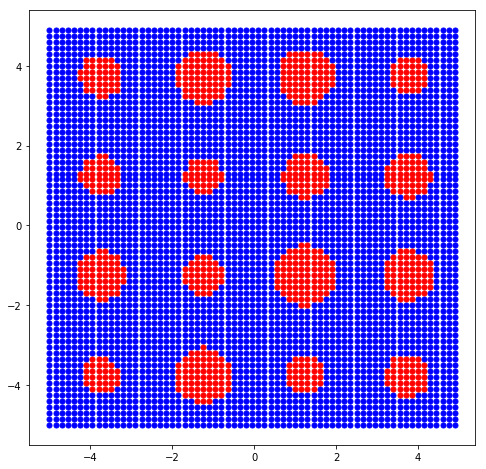

In [2]:
# Set up the system
box = freud.box.Box.square(L=10)
dx = 0.15
num_grains = 4
dg = box.Lx/num_grains
points = np.array([[i, j, 0]
                   for j in np.arange(-box.Ly/2, box.Ly/2, dx)
                   for i in np.arange(-box.Lx/2, box.Lx/2, dx)])
values = np.array([-1 for p in points])
centroids = [[i*dg + 0.5*dg, j*dg + 0.5*dg, 0]
             for i in range(num_grains) for j in range(num_grains)]
grain_radii = np.abs(np.random.normal(size=num_grains**2, loc=0.25*dg, scale=0.05*dg))
for center, radius in zip(centroids, grain_radii):
    lc = freud.locality.LinkCell(box, radius).compute(box, points, [center])
    for i in lc.nlist.index_i:
        values[i] = 1

blue_points = points[values < 0]
red_points = points[values > 0]

plt.figure(figsize=(8, 8))
plt.scatter(blue_points[:, 0],
            blue_points[:, 1],
            marker='o', color='blue', s=25)
plt.scatter(red_points[:, 0],
            red_points[:, 1],
            marker='o', color='red', s=25)
plt.show()

This system is **phase-separated** because the red particles are generally near one another, and so are the blue particles.

We can use `freud.interface.InterfaceMeasure` to label the particles on either side of the red-blue boundary.

In [3]:
iface = freud.interface.InterfaceMeasure(r_cut=0.2)
iface.compute(box=box, ref_points=blue_points, points=red_points)

We can count the points on either side of the interface:

In [4]:
print('There are', iface.ref_point_count, 'reference points on the interface.')
print('There are', iface.point_count, 'points on the interface.')

There are 380 reference points on the interface.
There are 316 points on the interface.


Now we can plot the particles on the interface. We color the outside of the interface cyan and the inside of the interface black.

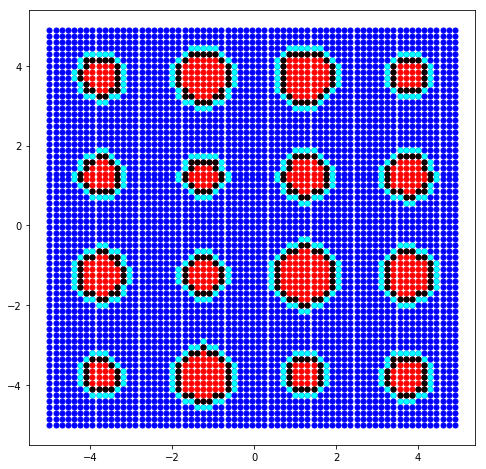

In [5]:
plt.figure(figsize=(8, 8))

plt.scatter(blue_points[:, 0],
            blue_points[:, 1],
            marker='o', color='blue', s=25)
plt.scatter(red_points[:, 0],
            red_points[:, 1],
            marker='o', color='red', s=25)

plt.scatter(blue_points[iface.ref_point_ids, 0],
            blue_points[iface.ref_point_ids, 1],
            marker='o', color='cyan', s=25)
plt.scatter(red_points[iface.point_ids, 0],
            red_points[iface.point_ids, 1],
            marker='o', color='black', s=25)

plt.show()